In [55]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

In [56]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

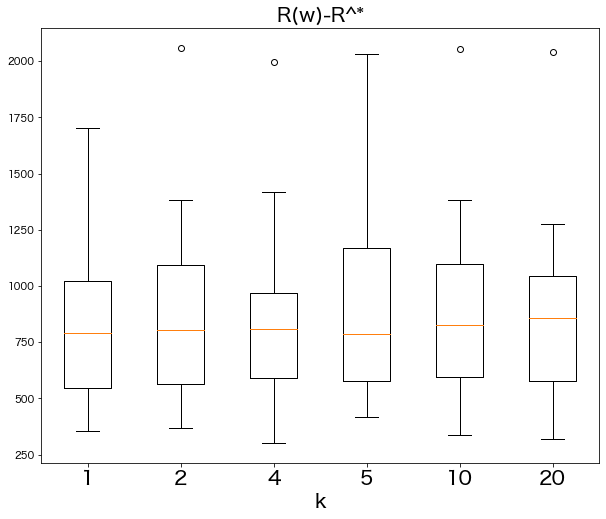

In [57]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [58]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,818.753441,916.489965,882.059959,917.774247,920.290464,897.290500
std,402.885947,515.439108,503.143240,501.522242,511.553234,503.245093
min,355.611481,367.674968,301.756063,416.356728,337.937974,319.793878
25%,546.291769,565.051074,591.989448,579.447198,596.641687,576.158998
50%,789.433244,805.007784,806.814825,785.584743,824.369867,855.527689
75%,1020.506360,1092.451023,966.676489,1169.620479,1097.599899,1046.272461
max,1701.831259,2059.341395,1995.563680,2032.792921,2053.096592,2038.611496


In [59]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1020.506360,1092.451023,966.676489,1169.620479,1097.599899,1046.272461
0.80,1040.930243,1157.090561,1074.136498,1249.290784,1180.750931,1102.275131
0.90,1115.115304,1451.677506,1476.188218,1400.514458,1450.805359,1352.230746
0.95,1408.473282,1755.509450,1735.875949,1716.653690,1751.950976,1695.421121
0.99,1643.159663,1998.575006,1943.626134,1969.565075,1992.867469,1969.973421


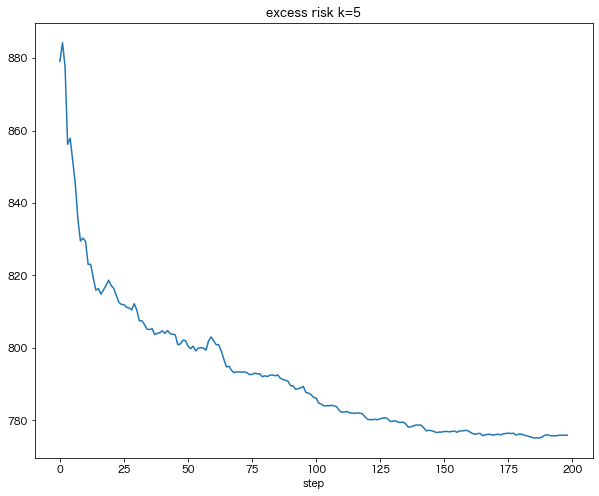

In [60]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [61]:
# 学習率は0.01/t * sqrt(d) ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

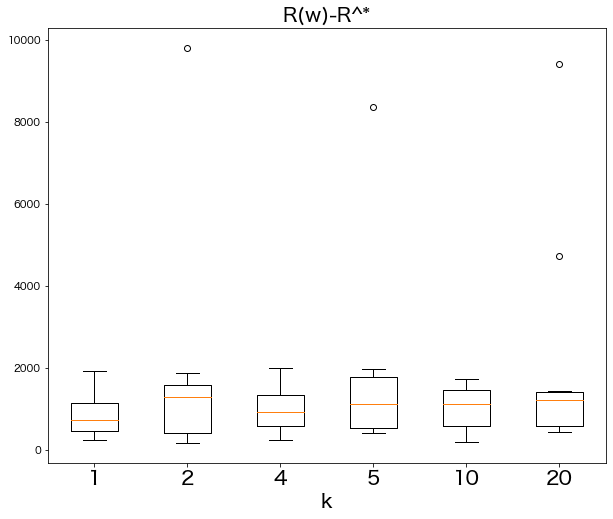

In [62]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [63]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,858.038534,1860.078593,992.544568,1804.805987,1032.818573,2144.939877
std,572.633751,2860.070598,583.719524,2382.624916,558.633725,2848.526925
min,228.712444,158.000434,229.815141,411.094056,179.698482,417.356886
25%,442.495949,397.743212,581.647395,523.860083,580.990117,572.480832
50%,726.406036,1274.745115,917.137754,1108.068420,1105.319943,1210.786754
75%,1134.749900,1580.431621,1341.705427,1759.819182,1457.017017,1397.443867
max,1923.397427,9808.223010,1992.174954,8371.707548,1732.986774,9417.748821


In [64]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1134.749900,1580.431621,1341.705427,1759.819182,1457.017017,1397.443867
0.80,1310.927120,1664.912398,1410.258346,1815.750081,1510.733427,2080.152659
0.90,1675.095132,2668.699740,1698.550235,2606.919404,1692.921188,5201.209255
0.95,1799.246280,6238.461375,1845.362595,5489.313476,1712.953981,7309.479038
0.99,1898.567198,9094.270683,1962.812482,7795.228733,1728.980215,8996.094864


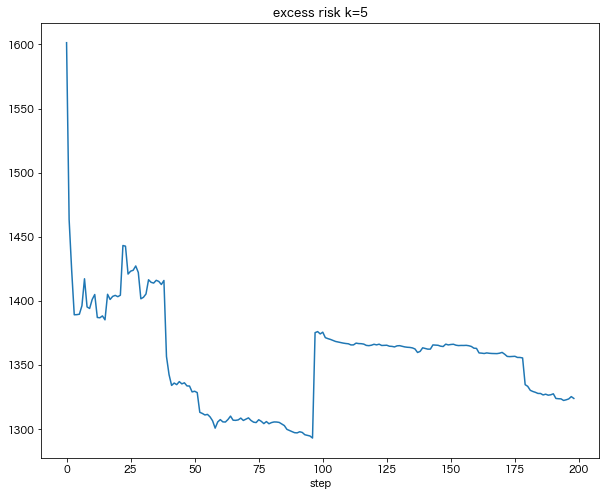

In [65]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [66]:
# 学習率は0.01/sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

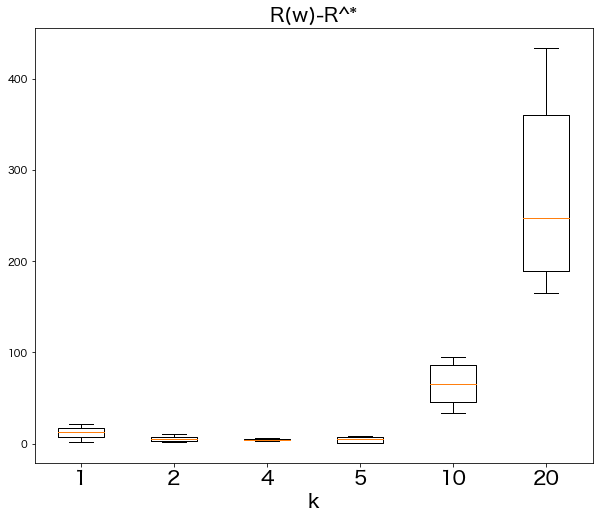

In [67]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [68]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.315887,5.599351,4.584616,4.355511,66.103535,277.289332
std,6.240163,2.875973,1.176259,3.295524,23.002366,105.035747
min,2.173259,2.303000,3.290423,0.638833,33.458816,165.715982
25%,7.675238,3.168740,3.554902,1.043117,46.174404,189.439227
50%,12.927248,5.191692,4.466119,4.746927,65.777908,247.557613
75%,16.610187,6.812281,5.003510,6.937605,86.563206,360.448057
max,21.741811,10.675818,6.511788,8.640324,95.502960,434.233486


In [69]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,16.610187,6.812281,5.003510,6.937605,86.563206,360.448057
0.80,17.355214,7.544077,5.308469,7.287429,88.766332,383.470765
0.90,18.464335,9.743151,6.393774,8.163959,92.982568,420.964731
0.95,20.103073,10.209484,6.452781,8.402141,94.242764,427.599108
0.99,21.414063,10.582551,6.499987,8.592687,95.250920,432.906610


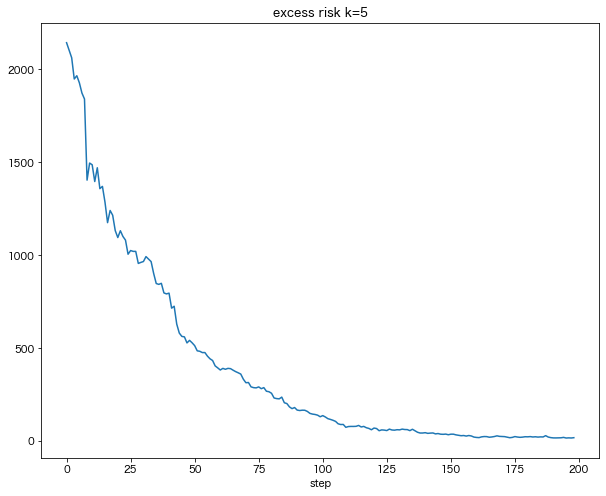

In [70]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [71]:
# 学習率は0.01/sqrt(d) ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

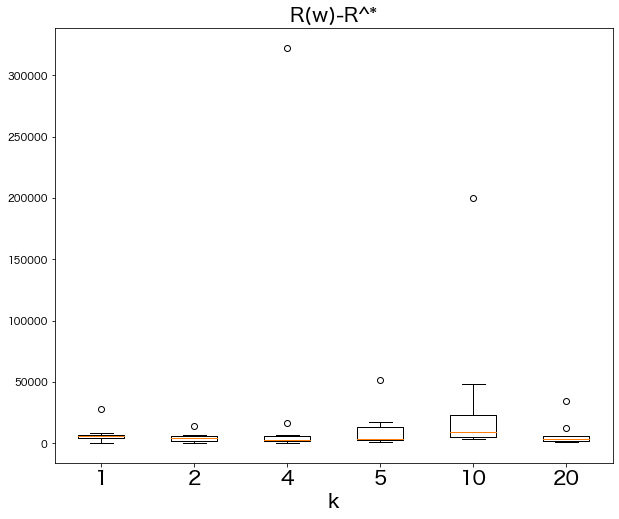

In [72]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [73]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7337.323569,4644.785746,36141.844936,10523.683766,32923.460275,7350.126728
std,7747.713918,4104.994080,100713.407745,15620.490230,60190.810823,10135.838314
min,682.884309,344.638482,436.841424,1547.068546,3947.544672,976.314189
25%,4230.797630,1599.556475,1769.967968,2515.000686,5430.962313,2250.621249
50%,5915.200251,4406.725707,3116.894878,3549.007423,9438.624952,3758.339111
75%,6610.989658,6331.783406,6450.614865,13276.654402,23244.451560,6030.692289
max,28415.972154,14046.440455,322468.816466,51793.576252,199705.215623,34510.507951


In [74]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,6610.989658,6331.783406,6450.614865,13276.654402,23244.451560,6030.692289
0.80,6968.939641,6570.491098,9095.425535,16380.815339,30126.848564,7579.161982
0.90,10341.990865,7492.750997,46994.134228,20622.953431,63630.341735,14976.605782
0.95,19378.981509,10769.595726,184731.475347,36208.264842,131667.778679,24743.556866
0.99,26608.574025,13391.071509,294921.348243,48676.513970,186097.728234,32557.117734


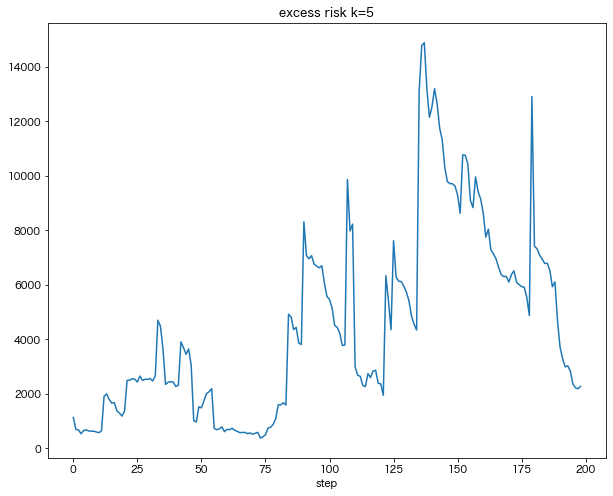

In [75]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()
